In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import shap

In [2]:
df = pd.read_csv('Aviation_KPIs_Dataset.xlsx - Sheet1.csv')
df.head()

,Flight Number,Scheduled Departure Time,Actual Departure Time,Delay (Minutes),Aircraft Utilization (Hours/Day),Turnaround Time (Minutes),Load Factor (%),Fleet Availability (%),Maintenance Downtime (Hours),Fuel Efficiency (ASK),Revenue (USD),Operating Cost (USD),Net Profit Margin (%),Ancillary Revenue (USD),Debt-to-Equity Ratio,Revenue per ASK,Cost per ASK,Profit (USD)
0,FL885,2024-05-20 11:51:21,2024-07-10 02:38:54,50,12.36,115,79.18,96.24,9.21,4.15,10953.75,27847.59,17.90,1058.68,2.46,2639.46,6710.26,-16893.84
1,FL930,2024-01-23 06:56:23,2024-07-07 02:53:44,27,14.53,83,98.59,80.49,1.55,3.93,31597.25,1564.41,7.70,2941.32,2.89,8040.01,398.07,30032.84
2,FL478,2024-05-30 09:18:39,2024-12-05 01:00:54,108,10.73,87,67.44,97.90,2.06,4.26,13700.27,30494.88,5.84,1920.45,1.34,3216.03,7158.42,-16794.61
3,FL637,2024-08-15 05:21:47,2024-09-21 13:23:42,64,15.10,99,69.01,80.17,6.85,4.13,39913.01,13444.09,24.09,3167.79,0.60,9664.17,3255.23,26468.92
4,FL318,2024-07-25 15:29:58,2024-03-21 15:05:54,30,13.46,114,50.36,82.23,7.30,4.97,11531.48,34668.98,7.18,619.80,0.84,2320.22,6975.65,-23137.50


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 18 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   Flight Number                     200000 non-null  object 
 1   Scheduled Departure Time          200000 non-null  object 
 2   Actual Departure Time             200000 non-null  object 
 3   Delay (Minutes)                   200000 non-null  int64  
 4   Aircraft Utilization (Hours/Day)  200000 non-null  float64
 5   Turnaround Time (Minutes)         200000 non-null  int64  
 6   Load Factor (%)                   200000 non-null  float64
 7   Fleet Availability (%)            200000 non-null  float64
 8   Maintenance Downtime (Hours)      200000 non-null  float64
 9   Fuel Efficiency (ASK)             200000 non-null  float64
 10  Revenue (USD)                     200000 non-null  float64
 11  Operating Cost (USD)              200000 non-null  f

In [4]:
df.duplicated().sum()

0

In [5]:
df.isnull().sum().unstack

<bound method Series.unstack of Flight Number                       0
Scheduled Departure Time            0
Actual Departure Time               0
Delay (Minutes)                     0
Aircraft Utilization (Hours/Day)    0
Turnaround Time (Minutes)           0
Load Factor (%)                     0
Fleet Availability (%)              0
Maintenance Downtime (Hours)        0
Fuel Efficiency (ASK)               0
Revenue (USD)                       0
Operating Cost (USD)                0
Net Profit Margin (%)               0
Ancillary Revenue (USD)             0
Debt-to-Equity Ratio                0
Revenue per ASK                     0
Cost per ASK                        0
Profit (USD)                        0
dtype: int64>

In [6]:
df.describe()

,Delay (Minutes),Aircraft Utilization (Hours/Day),Turnaround Time (Minutes),Load Factor (%),Fleet Availability (%),Maintenance Downtime (Hours),Fuel Efficiency (ASK),Revenue (USD),Operating Cost (USD),Net Profit Margin (%),Ancillary Revenue (USD),Debt-to-Equity Ratio,Revenue per ASK,Cost per ASK,Profit (USD)
count,200000.00000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,59.35885,12.003438,74.451680,74.997178,85.001378,5.503103,3.496959,25571.448338,20429.003323,15.011169,2550.025537,1.752445,7818.578193,6245.613443,5142.445015
std,34.67602,2.311966,25.977826,14.439393,8.672413,2.601257,0.865309,14158.512116,11316.410641,5.778340,1414.291993,0.720194,4947.028923,3957.358310,18123.595784
min,0.00000,8.000000,30.000000,50.000000,70.000000,1.000000,2.000000,1000.060000,800.030000,5.000000,100.020000,0.500000,203.110000,164.830000,-38973.960000
25%,29.00000,9.990000,52.000000,62.500000,77.480000,3.250000,2.750000,13297.042500,10609.022500,10.010000,1325.570000,1.130000,3812.782500,3041.547500,-7983.690000
50%,59.00000,12.010000,74.000000,74.960000,85.000000,5.500000,3.490000,25566.300000,20410.885000,15.000000,2544.210000,1.750000,7315.460000,5834.705000,5216.975000
75%,89.00000,14.010000,97.000000,87.530000,92.530000,7.760000,4.250000,37860.402500,30245.907500,20.010000,3776.387500,2.370000,10909.272500,8715.670000,18269.647500
max,119.00000,16.000000,119.000000,100.000000,100.000000,10.000000,5.000000,49999.950000,39999.840000,25.000000,5000.000000,3.000000,24999.340000,19928.340000,49054.690000


#  Cheking outlier in dataset

In [8]:
# Detect outliers using the IQR method for all numerical columns

# Select only numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64'])

# Function to detect outliers using IQR
def detect_outliers_iqr(df):
    outliers = {}
    for col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        outlier_condition = (df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))
        outliers[col] = df[outlier_condition][col]
    return outliers

# Detect outliers in the numerical columns
outliers = detect_outliers_iqr(numerical_cols)

# Display the number of outliers for each column
{col: len(outliers[col]) for col in outliers if len(outliers[col]) > 0}


{'Revenue per ASK': 1544, 'Cost per ASK': 1555}

In [9]:
# Function to remove outliers using IQR method
def remove_outliers_iqr(df):
    # Loop over columns to remove outliers
    for col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Filter out rows where outliers exist
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Remove outliers from the numerical columns
df_no_outliers = remove_outliers_iqr(numerical_cols)

# Check the shape before and after removing outliers
print(f"Original shape: {df.shape}")
print(f"Shape after removing outliers: {df_no_outliers.shape}")


Original shape: (200000, 18)
Shape after removing outliers: (197003, 15)


In [10]:
# Function to impute outliers using IQR method (replacing outliers with median)
def impute_outliers_iqr(df):
    for col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Impute outliers with the median of the column
        median = df[col].median()
        df[col] = df[col].apply(lambda x: median if x < lower_bound or x > upper_bound else x)
    return df

# Impute outliers in the numerical columns
df_imputed = impute_outliers_iqr(numerical_cols)

# Check the first few rows to confirm imputation
print(df_imputed.head())


   Delay (Minutes)  Aircraft Utilization (Hours/Day)  \
0               50                             12.36   
1               27                             14.53   
2              108                             10.73   
3               64                             15.10   
4               30                             13.46   

   Turnaround Time (Minutes)  Load Factor (%)  Fleet Availability (%)  \
0                        115            79.18                   96.24   
1                         83            98.59                   80.49   
2                         87            67.44                   97.90   
3                         99            69.01                   80.17   
4                        114            50.36                   82.23   

   Maintenance Downtime (Hours)  Fuel Efficiency (ASK)  Revenue (USD)  \
0                          9.21                   4.15       10953.75   
1                          1.55                   3.93       31597.25   
2    

# Exploratory Data Analysis (EDA)

    Correlation Analysis

# Checking the Correlation in the dataset

In [13]:
numerical=[]
categorical =[]
for col in df.columns:
    if df[col].dtypes=="O":
        categorical.append(col)
    else:
        numerical.append(col)
df[numerical].corr()


,Delay (Minutes),Aircraft Utilization (Hours/Day),Turnaround Time (Minutes),Load Factor (%),Fleet Availability (%),Maintenance Downtime (Hours),Fuel Efficiency (ASK),Revenue (USD),Operating Cost (USD),Net Profit Margin (%),Ancillary Revenue (USD),Debt-to-Equity Ratio,Revenue per ASK,Cost per ASK,Profit (USD)
Delay (Minutes),1.000000,0.000819,0.000579,0.000312,0.001825,0.003462,-0.003581,0.002174,0.001836,0.000392,-0.004391,-0.004197,0.003337,0.003696,0.000552
Aircraft Utilization (Hours/Day),0.000819,1.000000,-0.000716,-0.002950,-0.003256,0.001951,-0.000231,-0.002385,-0.000008,-0.001295,-0.000212,0.002170,-0.001580,0.000268,-0.001858
Turnaround Time (Minutes),0.000579,-0.000716,1.000000,-0.002279,-0.002353,-0.000229,-0.001041,0.001204,0.002625,0.002282,0.000887,-0.000362,0.001263,0.002775,-0.000699
Load Factor (%),0.000312,-0.002950,-0.002279,1.000000,0.001954,0.002869,-0.001853,-0.001075,0.000642,0.001407,0.000093,0.001273,0.000058,0.002399,-0.001240
Fleet Availability (%),0.001825,-0.003256,-0.002353,0.001954,1.000000,-0.001545,0.000574,-0.003051,0.001699,-0.000304,-0.002741,-0.001667,-0.003367,0.001098,-0.003445
Maintenance Downtime (Hours),0.003462,0.001951,-0.000229,0.002869,-0.001545,1.000000,-0.003429,-0.000952,-0.002287,0.002193,-0.001819,0.001120,0.000205,-0.001294,0.000684
Fuel Efficiency (ASK),-0.003581,-0.000231,-0.001041,-0.001853,0.000574,-0.003429,1.000000,-0.002239,-0.000456,0.001775,0.001156,-0.002301,-0.413438,-0.412242,-0.001465
Revenue (USD),0.002174,-0.002385,0.001204,-0.001075,-0.003051,-0.000952,-0.002239,1.000000,0.000187,-0.000526,0.000689,0.000873,0.875184,0.001253,0.781103
Operating Cost (USD),0.001836,-0.000008,0.002625,0.000642,0.001699,-0.002287,-0.000456,0.000187,1.000000,-0.003008,-0.000376,0.003083,0.000961,0.875047,-0.624256
Net Profit Margin (%),0.000392,-0.001295,0.002282,0.001407,-0.000304,0.002193,0.001775,-0.000526,-0.003008,1.000000,0.001647,0.002767,-0.000707,-0.003291,0.001468


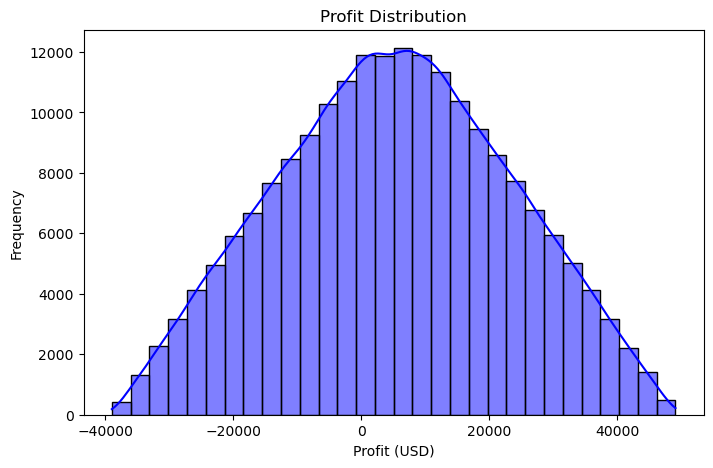

In [14]:
# 📊 1. Profit Distribution (Histogram & KDE)
plt.figure(figsize=(8, 5))
sns.histplot(df["Profit (USD)"], bins=30, kde=True, color="blue")
plt.title("Profit Distribution")
plt.xlabel("Profit (USD)")
plt.ylabel("Frequency")
plt.savefig("profit_distribution.png")
plt.show()

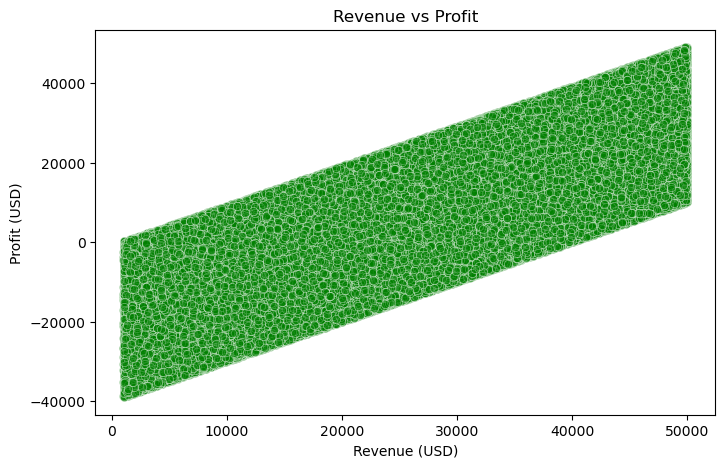

In [15]:
# 📊 2. Revenue vs. Profit (Scatter Plot)
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["Revenue (USD)"], y=df["Profit (USD)"], alpha=0.5, color="green")
plt.title("Revenue vs Profit")
plt.xlabel("Revenue (USD)")
plt.ylabel("Profit (USD)")
plt.savefig("revenue_vs_profit.png")
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_20048\3579112338.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=pd.qcut(df["Load Factor (%)"], q=4), y=df["Profit (USD)"], palette="coolwarm")


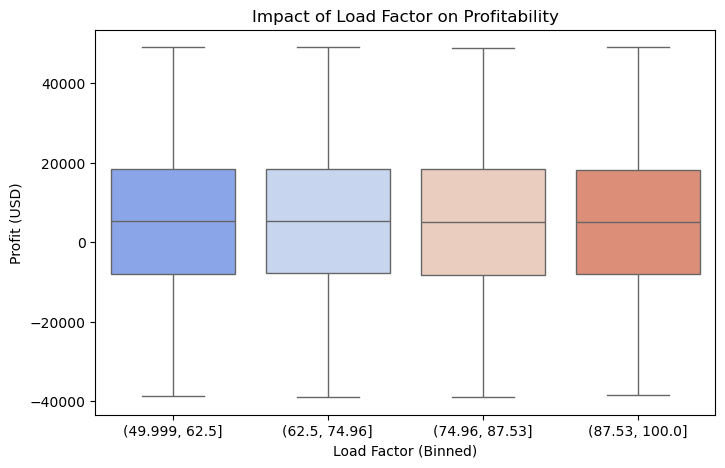

In [16]:
# 📊 3. Load Factor Impact on Profit (Box Plot)
plt.figure(figsize=(8, 5))
sns.boxplot(x=pd.qcut(df["Load Factor (%)"], q=4), y=df["Profit (USD)"], palette="coolwarm")
plt.title("Impact of Load Factor on Profitability")
plt.xlabel("Load Factor (Binned)")
plt.ylabel("Profit (USD)")
plt.savefig("load_factor_vs_profit.png")
plt.show()


C:\Users\hp\AppData\Local\Temp\ipykernel_20048\4238309182.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pd.qcut(df["Fleet Availability (%)"], q=4), y=df["Profit (USD)"], palette="viridis")


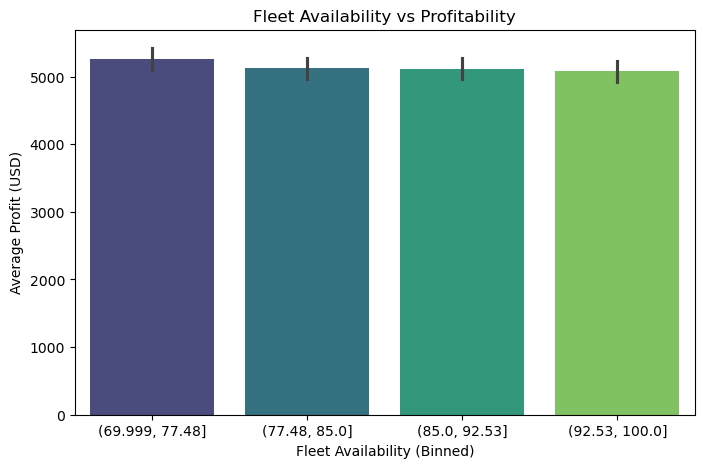

In [17]:
# 📊 4. Fleet Availability vs. Profitability (Bar Chart)
plt.figure(figsize=(8, 5))
sns.barplot(x=pd.qcut(df["Fleet Availability (%)"], q=4), y=df["Profit (USD)"], palette="viridis")
plt.title("Fleet Availability vs Profitability")
plt.xlabel("Fleet Availability (Binned)")
plt.ylabel("Average Profit (USD)")
plt.savefig("fleet_availability_vs_profit.png")
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_20048\2176526341.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=pd.qcut(df["Delay (Minutes)"], q=4), y=df["Profit (USD)"], palette="magma")


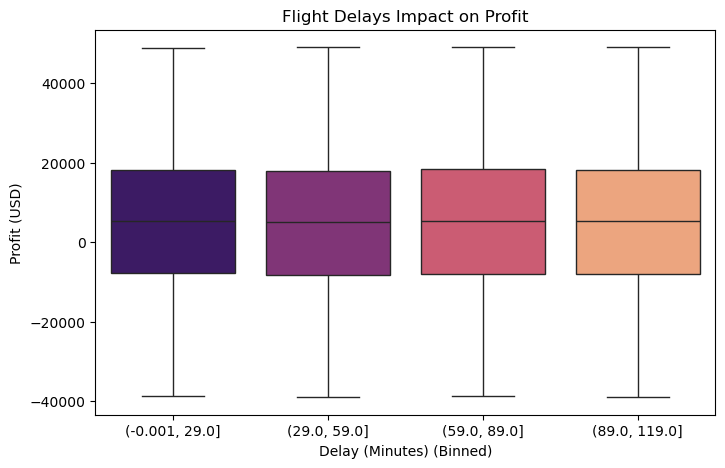

In [18]:
# 📊 7. Flight Delays Impact on Profitability (Box Plot)
plt.figure(figsize=(8, 5))
sns.boxplot(x=pd.qcut(df["Delay (Minutes)"], q=4), y=df["Profit (USD)"], palette="magma")
plt.title("Flight Delays Impact on Profit")
plt.xlabel("Delay (Minutes) (Binned)")
plt.ylabel("Profit (USD)")
plt.savefig("flight_delays_vs_profit.png")
plt.show()

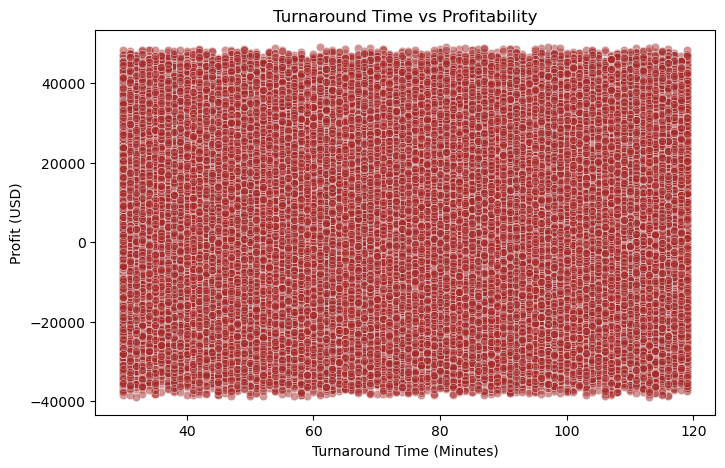

In [19]:
# 📊 8. Turnaround Time vs. Profitability (Scatter Plot)
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["Turnaround Time (Minutes)"], y=df["Profit (USD)"], alpha=0.5, color="brown")
plt.title("Turnaround Time vs Profitability")
plt.xlabel("Turnaround Time (Minutes)")
plt.ylabel("Profit (USD)")
plt.savefig("turnaround_time_vs_profit.png")
plt.show()

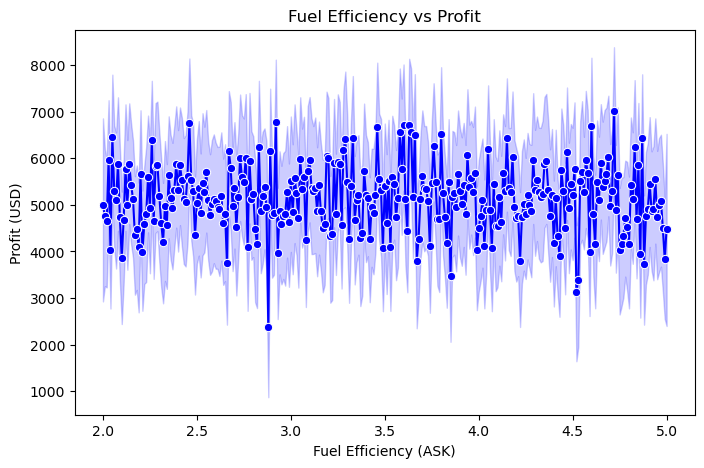

In [20]:
# 📊 9. Fuel Efficiency vs. Profit (Line Chart)
plt.figure(figsize=(8, 5))
sns.lineplot(x=df["Fuel Efficiency (ASK)"], y=df["Profit (USD)"], marker="o", color="blue")
plt.title("Fuel Efficiency vs Profit")
plt.xlabel("Fuel Efficiency (ASK)")
plt.ylabel("Profit (USD)")
plt.savefig("fuel_efficiency_vs_profit.png")
plt.show()

<Figure size 800x500 with 0 Axes>

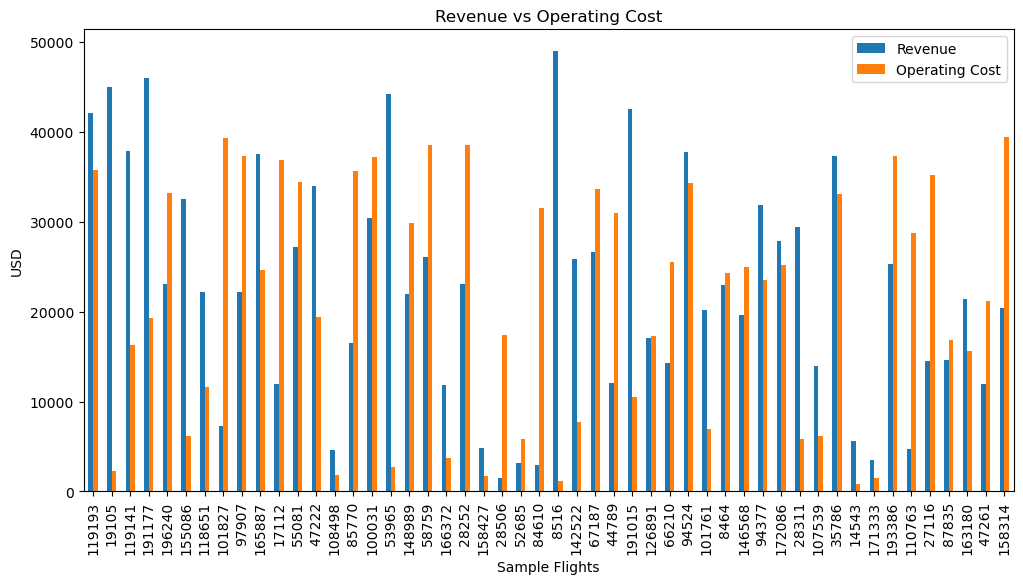

In [21]:
# 📊 10. Revenue & Cost Comparison (Bar Chart)
plt.figure(figsize=(8, 5))
df_sample = df.sample(50)  # Reduce data points for readability
df_sample[["Revenue (USD)", "Operating Cost (USD)"]].plot(kind="bar", figsize=(12, 6))
plt.title("Revenue vs Operating Cost")
plt.xlabel("Sample Flights")
plt.ylabel("USD")
plt.legend(["Revenue", "Operating Cost"])
plt.savefig("revenue_vs_cost.png")
plt.show()